# 0. Check version & import des modules

In [1]:
import sklearn

print(sklearn.__version__)

0.20.2


In [2]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /home/girardea/anaconda3/lib/python3.6/site-packages (0.0)


In [3]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# 1. Chargement du jeu de données 'IRIS'

In [4]:
df = sns.load_dataset('iris')

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
119,6.0,2.2,5.0,1.5,virginica
103,6.3,2.9,5.6,1.8,virginica
50,7.0,3.2,4.7,1.4,versicolor


In [5]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

# 2. Exploration visuelle des données (EDA)

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


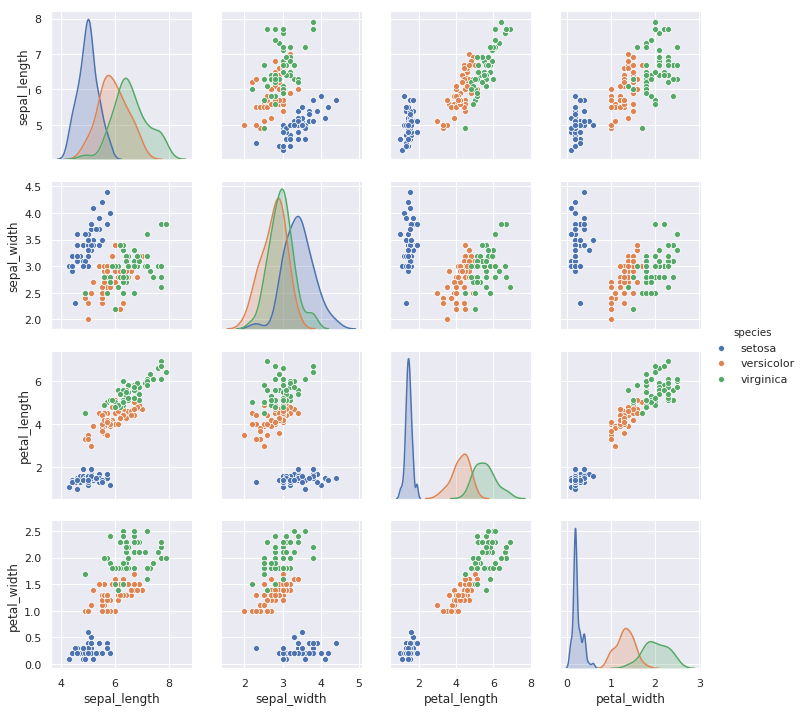

In [7]:
sns.pairplot(df, hue='species')

# 3. Premier algo : plus proches voisins

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# instanciation
clf = KNeighborsClassifier()

# quels sont les facteurs explicatifs ? les 4 premières colonnes
X = df.iloc[: ,:4]

# quel est le libellé (ce qu'on cherche à deviner) ?
y = df['species']

# apprentissage
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# prédiction
clf.predict(X.iloc[:4])

array(['setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [12]:
clf.predict_proba(X.sample(5))

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

Comparons sur l'ensemble du jeu de données.

In [13]:
y_pred = clf.predict(X)

In [14]:
y_pred[:4]

array(['setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [17]:
(y_pred == y).mean()

0.9666666666666667

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


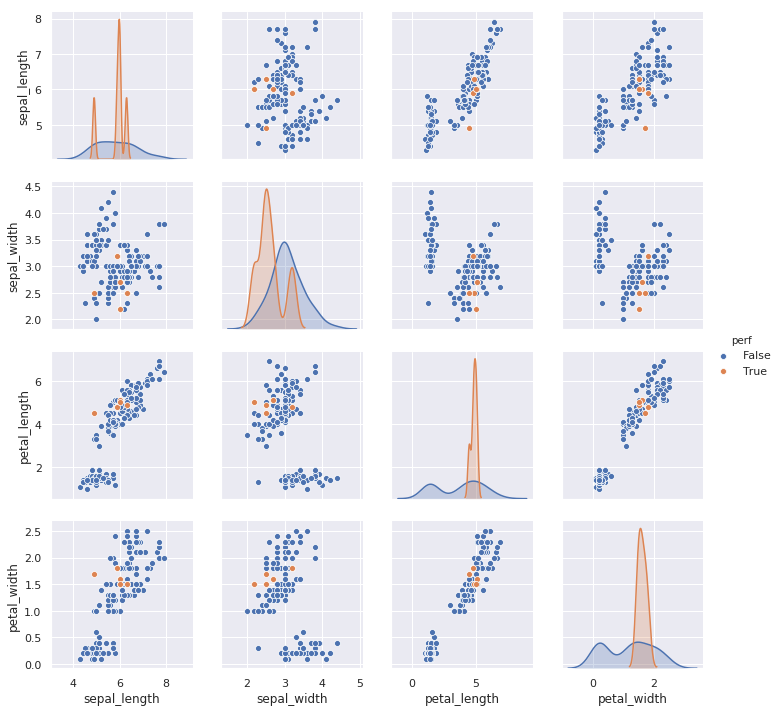

In [22]:
df['perf'] = (y_pred != y )

sns.pairplot(df, hue='perf', vars=df.columns[:4])

In [26]:
neighbors_max = 150

scores = []

for i in range(1, neighbors_max):
    clf = KNeighborsClassifier(n_neighbors=i)
    
    clf.fit(X, y)
    
    y_pred = clf.predict(X)
    
    scores.append((y == y_pred).mean())

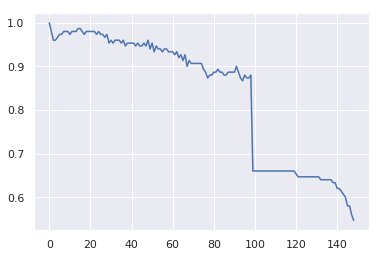

In [27]:
plt.plot(scores)

## Validation croisée

**Ne pas utiliser le même jeu de données pour l'apprentissage et le test.**

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y)

print(len(X_train), len(X_test))

105 45


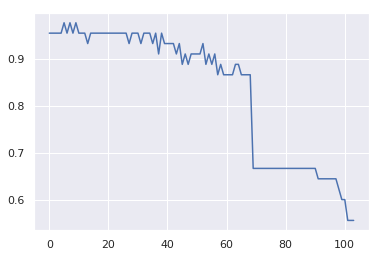

In [33]:
neighbors_max = 105

scores = []

for i in range(1, neighbors_max):
    clf = KNeighborsClassifier(n_neighbors=i)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    scores.append((y_test == y_pred).mean())
    
plt.plot(scores)

Il faut aussi moyenner sur tous les splits possibles.

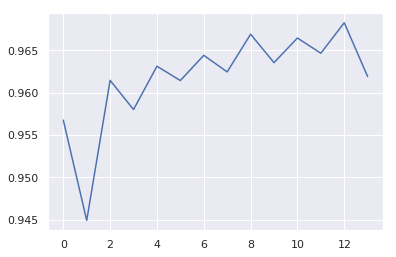

In [35]:
neighbors_max = 15

nb = 1000

scores = []

for i in range(1, neighbors_max):
    
    clf = KNeighborsClassifier(n_neighbors=i)
    
    score = 0
    
    for j in range(nb):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                           stratify=y)
    
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        
        score += (y_test == y_pred).mean()
    
    scores.append(score / nb)
    
plt.plot(scores)

# 2. Un nouvel exemple

In [36]:
df = sns.load_dataset('titanic')

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
426,1,2,female,28.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
226,1,2,male,19.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,yes,True
643,1,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
699,0,3,male,42.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True


## Extraire X et y

In [37]:
# On vire lees lignes avec des âges vides
df = df.dropna(subset=['age'])

In [45]:
X = df.loc[:, ['age', 'fare', 'pclass']]
X['male'] = (df['sex'] == 'male')

X.sample(5)

,age,fare,pclass,male
307,17.0,108.90,1,False
70,32.0,10.50,2,True
290,26.0,78.85,1,False
724,27.0,53.10,1,True
655,24.0,73.50,2,True


In [46]:
y = (df['survived'] == 1)

y[:4]

0    False
1     True
2     True
3     True
Name: survived, dtype: bool

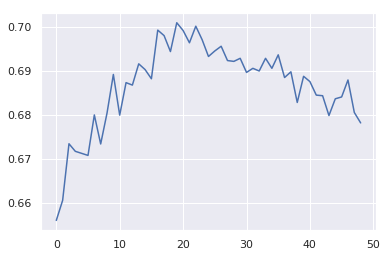

In [47]:
neighbors_max = 50

nb = 100

scores = []

for i in range(1, neighbors_max):
    
    clf = KNeighborsClassifier(n_neighbors=i)
    
    score = 0
    
    for j in range(nb):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                           stratify=y)
    
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        
        score += (y_test == y_pred).mean()
    
    scores.append(score / nb)
    
plt.plot(scores)
plt.ylim(0, 1)

In [49]:
# faux positifs (on a dit qu'ils survivraient mais en fait non)
((y_pred == True) & (y_test == False)).sum()

23

In [50]:
len(y_test)

215

In [53]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(y_test, y_pred, labels=[True, False]))

[[ 48  39]
 [ 23 105]]
